# Genes confirmed as a core signature for homeostatic microglia

# Loads

## Libraries and functions

In [12]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [13]:
source("functions.R")

## Data

In [14]:
load("../results/dge/norm_counts.RData")

In [15]:
t = read.xlsx("../data/differentially_regulated_microglial_genes.xlsx", 1, header=TRUE, colClasses=NA)
head(t)
cluster1 = na.omit(t[,3])
cluster2 = na.omit(t[,5])

Homeostatic.microglia,cluster.1,NA.,cluster.2,NA..1
NA,ENSMUSG00000059013,Sh2d3c,ENSMUSG00000032609,Klhdc8b
NA,ENSMUSG00000023882,Zfp54,ENSMUSG00000061143,Maml3
NA,ENSMUSG00000105304,NA,ENSMUSG00000047867,Gimap6
NA,ENSMUSG00000071203,Naip5,ENSMUSG00000029513,Prkab1
NA,ENSMUSG00000025648,Pfkfb4,ENSMUSG00000029343,Crybb1
NA,ENSMUSG00000046207,Pik3r6,ENSMUSG00000028976,Slc2a5


# Plot log2FC

## Male vs Female at 52w

In [20]:
M_vs_F = read.table("../results/dge/gender-effect/gender_age/fc_deg", h = T, row.names = 1, sep = "\t")
colnames(M_vs_F) = c("M VS F (8w)", "M VS F (52w)", "M VS F (104w)")
M_vs_F_52w = list()
M_vs_F_52w$all = M_vs_F[!is.na(M_vs_F[,"M VS F (52w)"]),"M VS F (52w)"]
names(M_vs_F_52w$all) = rownames(M_vs_F)[!is.na(M_vs_F[,"M VS F (52w)"])]
M_vs_F_52w$in_cluster1 = M_vs_F_52w$all[names(M_vs_F_52w$all) %in% cluster1]
M_vs_F_52w$in_cluster2 = M_vs_F_52w$all[names(M_vs_F_52w$all) %in% cluster2]
sapply(M_vs_F_52w, length)
capture.output(M_vs_F_52w, file = "../results/dge/homeostatic_core_signature_genes/M_vs_F_52w")

all in_cluster1 in_cluster2 
       4299         178         213

In [24]:
data = data.frame(genes = c(names(M_vs_F_52w$all), names(M_vs_F_52w$in_cluster1), names(M_vs_F_52w$in_cluster2)),
                  log2fc = c(M_vs_F_52w$all, M_vs_F_52w$in_cluster1, M_vs_F_52w$in_cluster2),
                  type = c(rep("all", length(M_vs_F_52w$all)), rep("in cluster 1", length(M_vs_F_52w$in_cluster1)), rep("in cluster 2", length(M_vs_F_52w$in_cluster2))))
head(data)

genes,log2fc,type
0610010K14Rik,-0.4018530,all
0610030E20Rik,0.8366523,all
0610039K10Rik,2.1683734,all
1110004F10Rik,-0.1979644,all
1110008F13Rik,-0.1686105,all
1110037F02Rik,0.5701119,all


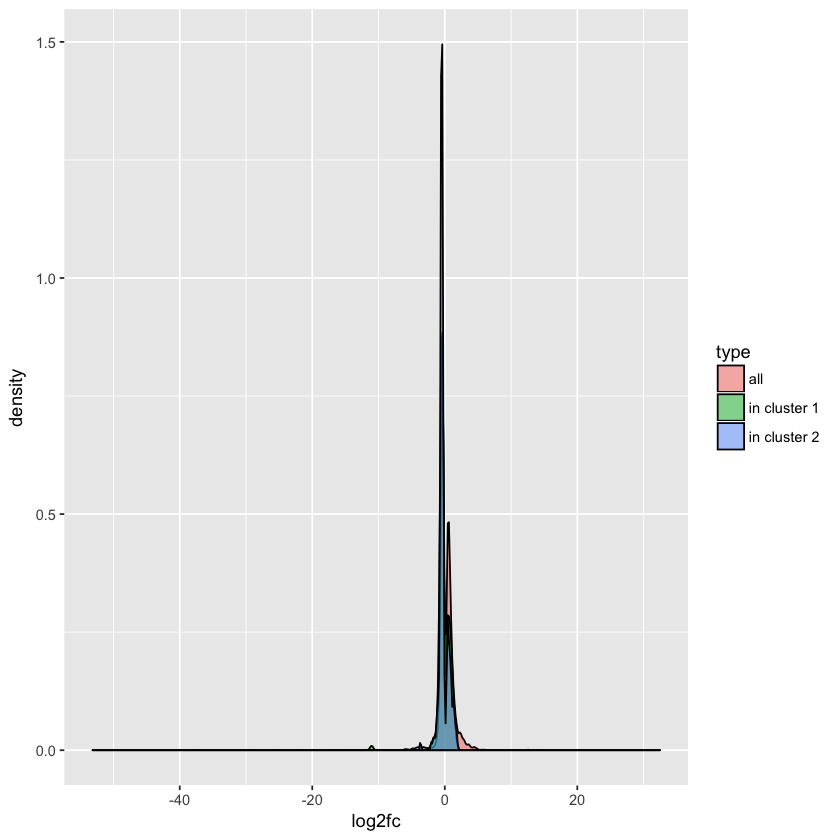

In [25]:
ggplot(data, aes(x = log2fc, fill = type)) + geom_density(alpha = 0.5)

## GF vs SPF

In [28]:
GF_vs_SPF = read.table("../results/dge/type-effect/type_age/fc_deg", h = T, row.names = 1, sep = "\t")
colnames(GF_vs_SPF) = c("GF VS SPF (8w)", "GF VS SPF (52w)", "GF VS SPF (104w)")
# 8w
de = !is.na(GF_vs_SPF[,"GF VS SPF (8w)"])
GF_vs_SPF_8w = list()
GF_vs_SPF_8w$all = GF_vs_SPF[de,"GF VS SPF (8w)"]
names(GF_vs_SPF_8w$all) = rownames(GF_vs_SPF)[de]
GF_vs_SPF_8w$in_cluster1 = GF_vs_SPF_8w$all[names(GF_vs_SPF_8w$all) %in% cluster1]
GF_vs_SPF_8w$in_cluster2 = GF_vs_SPF_8w$all[names(GF_vs_SPF_8w$all) %in% cluster2]
capture.output(GF_vs_SPF_8w, file = "../results/dge/homeostatic_core_signature_genes/GF_vs_SPF_8w")
GF_vs_SPF_8w_data = data.frame(
    genes = c(names(GF_vs_SPF_8w$all), names(GF_vs_SPF_8w$in_cluster1), names(GF_vs_SPF_8w$in_cluster2)),
    log2fc = c(GF_vs_SPF_8w$all, GF_vs_SPF_8w$in_cluster1, GF_vs_SPF_8w$in_cluster2),
    type = c(rep("all", length(GF_vs_SPF_8w$all)), rep("in cluster 1", length(GF_vs_SPF_8w$in_cluster1)), rep("in cluster 2", length(GF_vs_SPF_8w$in_cluster2))))
# 52w
de = !is.na(GF_vs_SPF[,"GF VS SPF (52w)"])
GF_vs_SPF_52w = list()
GF_vs_SPF_52w$all = GF_vs_SPF[de,"GF VS SPF (52w)"]
names(GF_vs_SPF_52w$all) = rownames(GF_vs_SPF)[de]
GF_vs_SPF_52w$in_cluster1 = GF_vs_SPF_52w$all[names(GF_vs_SPF_52w$all) %in% cluster1]
GF_vs_SPF_52w$in_cluster2 = GF_vs_SPF_52w$all[names(GF_vs_SPF_52w$all) %in% cluster2]
capture.output(GF_vs_SPF_52w, file = "../results/dge/homeostatic_core_signature_genes/GF_vs_SPF_52w")
GF_vs_SPF_52w_data = data.frame(
    genes = c(names(GF_vs_SPF_52w$all), names(GF_vs_SPF_52w$in_cluster1), names(GF_vs_SPF_52w$in_cluster2)),
    log2fc = c(GF_vs_SPF_52w$all, GF_vs_SPF_52w$in_cluster1, GF_vs_SPF_52w$in_cluster2),
    type = c(rep("all", length(GF_vs_SPF_52w$all)), rep("in cluster 1", length(GF_vs_SPF_52w$in_cluster1)), rep("in cluster 2", length(GF_vs_SPF_52w$in_cluster2))))
# 104w
de = !is.na(GF_vs_SPF[,"GF VS SPF (104w)"])
GF_vs_SPF_104w = list()
GF_vs_SPF_104w$all = GF_vs_SPF[de,"GF VS SPF (104w)"]
names(GF_vs_SPF_104w$all) = rownames(GF_vs_SPF)[de]
GF_vs_SPF_104w$in_cluster1 = GF_vs_SPF_104w$all[names(GF_vs_SPF_104w$all) %in% cluster1]
GF_vs_SPF_104w$in_cluster2 = GF_vs_SPF_104w$all[names(GF_vs_SPF_104w$all) %in% cluster2]
capture.output(GF_vs_SPF_104w, file = "../results/dge/homeostatic_core_signature_genes/GF_vs_SPF_104w")
GF_vs_SPF_104w_data = data.frame(
    genes = c(names(GF_vs_SPF_104w$all), names(GF_vs_SPF_104w$in_cluster1), names(GF_vs_SPF_104w$in_cluster2)),
    log2fc = c(GF_vs_SPF_104w$all, GF_vs_SPF_104w$in_cluster1, GF_vs_SPF_104w$in_cluster2),
    type = c(rep("all", length(GF_vs_SPF_104w$all)), rep("in cluster 1", length(GF_vs_SPF_104w$in_cluster1)), rep("in cluster 2", length(GF_vs_SPF_104w$in_cluster2))))

all in_cluster1 in_cluster2 
        337          21          37

all in_cluster1 in_cluster2 
        779          43          67

all in_cluster1 in_cluster2 
       2622          71          91

### 8w

In [33]:
sapply(GF_vs_SPF_8w, length)

all in_cluster1 in_cluster2 
        337          21          37

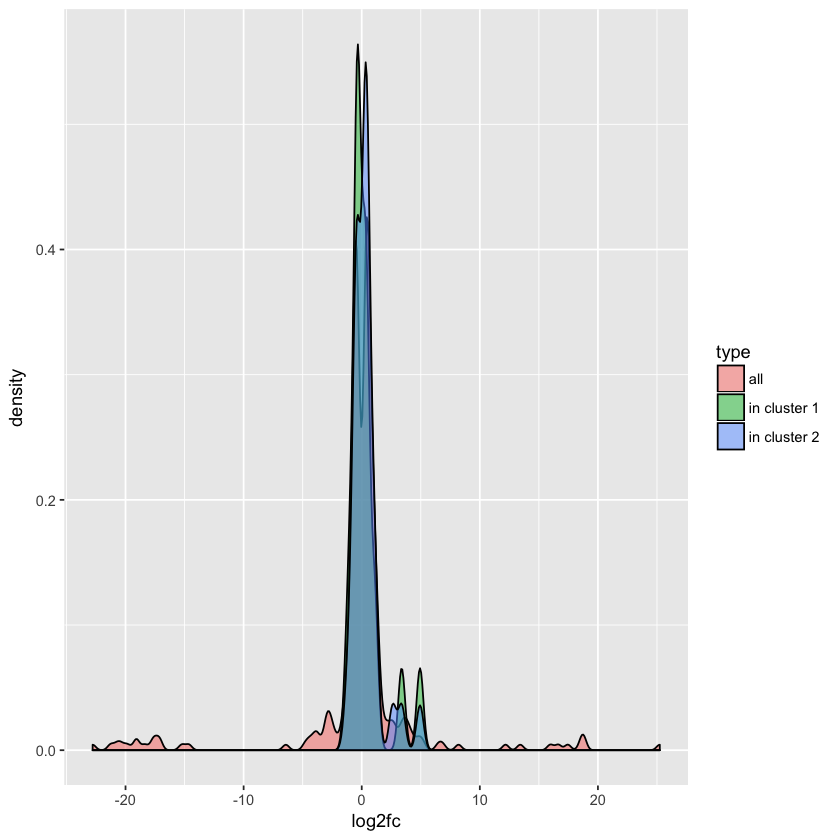

In [30]:
ggplot(GF_vs_SPF_8w_data, aes(x = log2fc, fill = type)) + geom_density(alpha = 0.5)

### 52w

In [34]:
sapply(GF_vs_SPF_52w, length)

all in_cluster1 in_cluster2 
        779          43          67

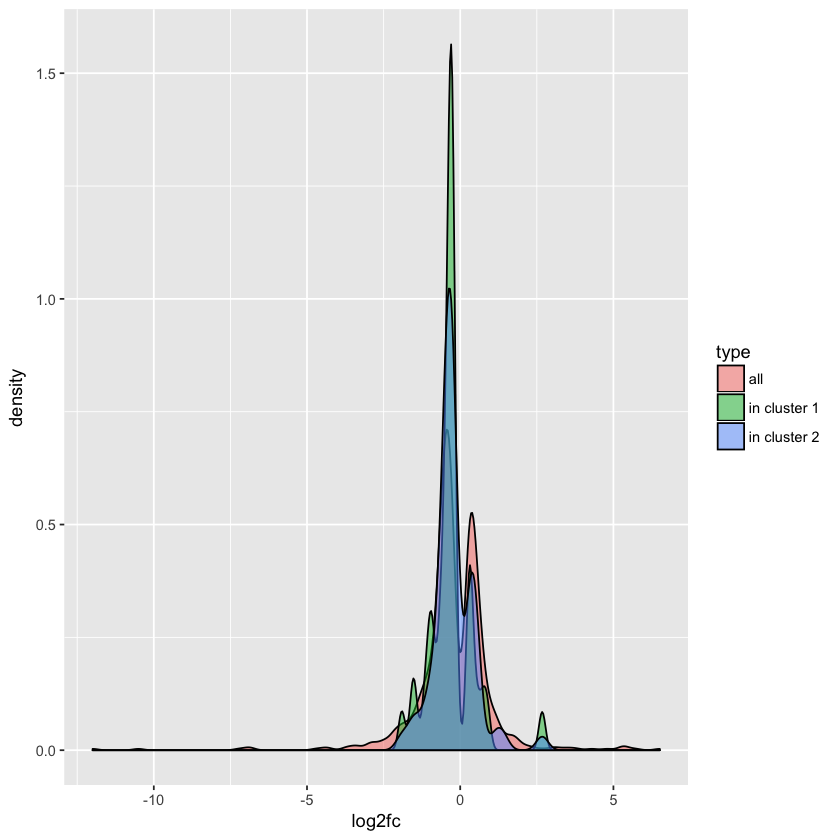

In [31]:
ggplot(GF_vs_SPF_52w_data, aes(x = log2fc, fill = type)) + geom_density(alpha = 0.5)

### 104w

In [35]:
sapply(GF_vs_SPF_104w, length)

all in_cluster1 in_cluster2 
       2622          71          91

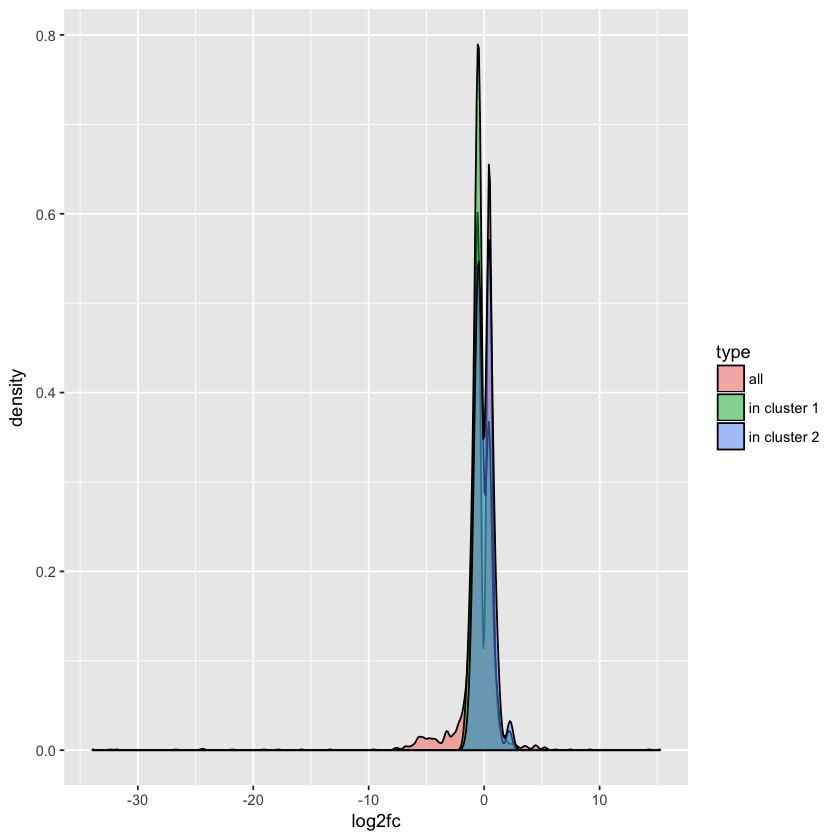

In [32]:
ggplot(GF_vs_SPF_104w_data, aes(x = log2fc, fill = type)) + geom_density(alpha = 0.5)